Object Detection non Real-time using (Image Classification)

Library

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os 
import shutil
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.12.0


path masing masing data & classnya

In [2]:
img_height = 75
img_width = 75
batch_size = 20

training_dat = tf.keras.utils.image_dataset_from_directory(
    "FooDD/TRAIN/",
    image_size = (img_height, img_width),
    batch_size=batch_size
)

validation_dat = tf.keras.utils.image_dataset_from_directory(
    "FooDD/VALIDATION/",
    image_size = (img_height, img_width),
    batch_size=batch_size
)

test_dat = tf.keras.utils.image_dataset_from_directory(
    "FooDD/TEST/",
    image_size = (img_height, img_width),
    batch_size=batch_size
)

Found 339 files belonging to 9 classes.
Found 72 files belonging to 9 classes.
Found 84 files belonging to 9 classes.


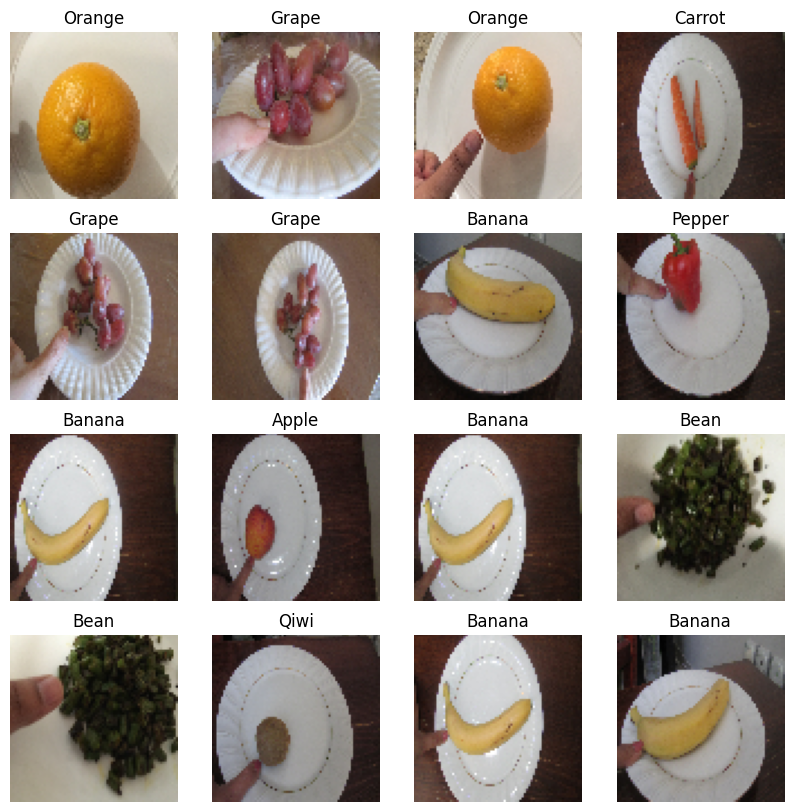

In [3]:
class_names = ["Apple", "Banana", "Bean", "Carrot", "Grape", "Orange", "Pepper", "Qiwi", "Tomato"]
plt.figure(figsize=(10, 10))
for images, labels in training_dat.take(1) : 
    for i in range(16) : 
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8")) #untuk ambil image ke-i
        plt.title(class_names[labels[i]]) #dengan penamaan labels menyesuaikan image ke-i
        plt.axis("off")

Build Neural Network Architechture

In [14]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(9, activation="softmax")
    ]
)
model.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
model.fit(
    training_dat,
    validation_data=validation_dat,
    epochs=10
)

Epoch 1/10
17/17 [==============================] - 8s 212ms/step - loss: 1.9429 - accuracy: 0.2832 - val_loss: 1.7609 - val_accuracy: 0.4444
Epoch 2/10
17/17 [==============================] - 5s 187ms/step - loss: 1.2715 - accuracy: 0.5457 - val_loss: 1.3607 - val_accuracy: 0.5000
Epoch 3/10
17/17 [==============================] - 5s 212ms/step - loss: 0.9057 - accuracy: 0.6667 - val_loss: 1.1507 - val_accuracy: 0.6389
Epoch 4/10
17/17 [==============================] - 5s 187ms/step - loss: 0.5968 - accuracy: 0.7611 - val_loss: 0.9123 - val_accuracy: 0.6667
Epoch 5/10
17/17 [==============================] - 5s 188ms/step - loss: 0.4697 - accuracy: 0.8378 - val_loss: 0.7452 - val_accuracy: 0.6806
Epoch 6/10
17/17 [==============================] - 5s 199ms/step - loss: 0.3854 - accuracy: 0.8673 - val_loss: 0.4941 - val_accuracy: 0.8194
Epoch 7/10
17/17 [==============================] - 5s 191ms/step - loss: 0.3226 - accuracy: 0.8850 - val_loss: 0.6194 - val_accuracy: 0.7500
Epoch 

In [125]:
model.evaluate(test_dat)

5/5 [==============================] - 1s 10ms/step - loss: 0.3593 - accuracy: 0.9167


[0.3592553734779358, 0.9166666865348816]

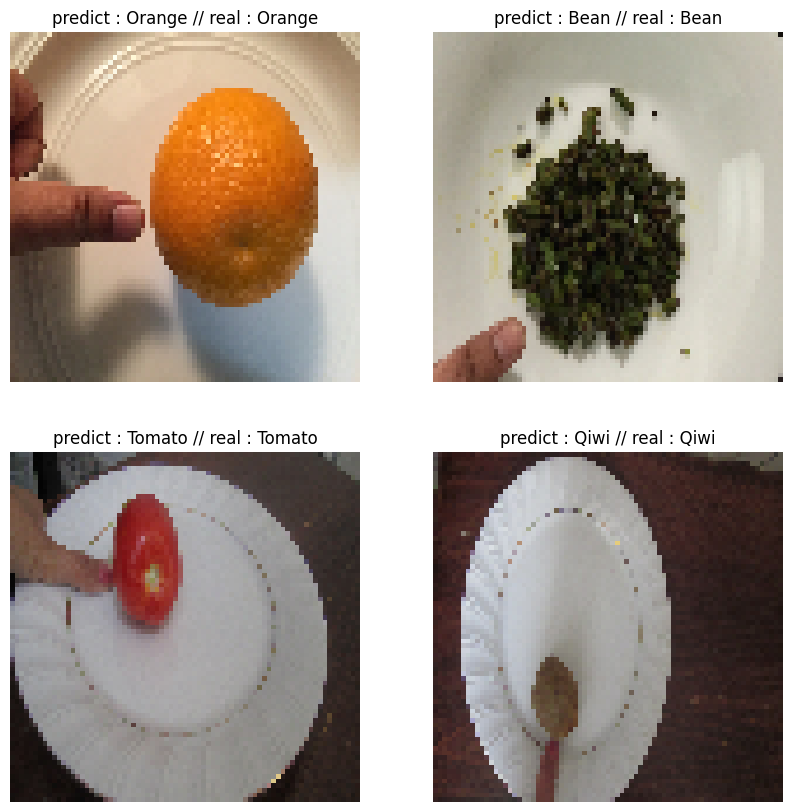

In [126]:
plt.figure(figsize=(10, 10))
#plt.subplots_adjust(hspace=1, wspace=1)
for images, labels in test_dat.take(1):
    classification = model(images)
    #print(classification) #probabilitas untuk prediksi masing masing dari 9 kelas tersebut
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8")) #untuk ambil image ke-i
        index = np.argmax(classification[i])
        plt.title("predict : " + class_names[index] + " // real : " + class_names[labels[i]]) #dengan penamaan labels menyesuaikan image ke-i
        plt.axis("off")